# Analyse des Ventes : Compréhension des Habitudes d'Achat

## Importer les libraires

In [87]:
import pandas as pd
import os


## Fusionner data de 12 mois en un seul fichier

In [88]:

# Definir path qui contient les fichiers CSV 
path = "C:/Users/DELL/Documents/PANDAS PROJECT/PROJECT1/data"


# liste des fichiers non caches
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

#  Boucle à travers chaque fichier et ajoute ses données au DataFrame
for file in files:
    try:
        current_data = pd.read_csv(os.path.join(path, file))
        all_months_data = pd.concat([all_months_data, current_data], ignore_index=True)
    except Exception as e:
        print(f"Erreur lecture {file}: {e}")

# Enregistrer data en un nouveau CSV file
try:
    all_months_data.to_csv("all_data.csv", index=False)
    print("Nouveaux Data en un nouveau fichier all_data.csv")
except Exception as e:
    print(f"Erreur enregistrement Data: {e}")


Nouveaux Data en un nouveau fichier all_data.csv


In [89]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Commancer par Data cleaning !

###  Supprimer les ligne NAN !


In [90]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [91]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###  Supprimer 'or' de la date!


In [92]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

### regler les types 

In [93]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augmenter les données avec des colonnes supplémentaires !







### Ajouter la colonne 'Month'

In [94]:

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Ajouter la colonne du 'City'

In [95]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Exploration des Donnée !

### Quel a été le meilleur mois en termes de ventes ?

### Ajouter une colonne de Sales

In [96]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.groupby(['Month']).sum()['Sales']


Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

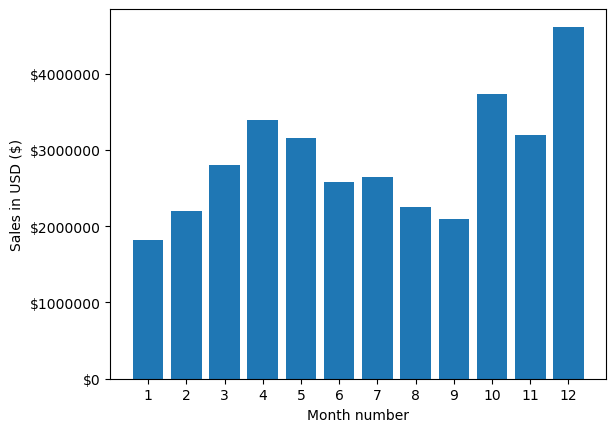

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

months = range(1,13)

plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Number of Orders by Month')

plt.show()

## Quelle ville a vendu le plus de produits ?

In [98]:
all_data.groupby(['City']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City (NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland (ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland (OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco (CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


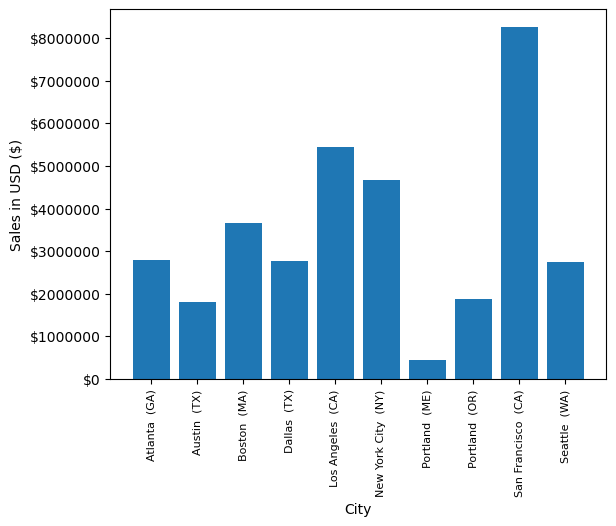

In [99]:
import matplotlib.pyplot as plt


# Extract city names directly from the grouped DataFrame
keys = list(all_data.groupby('City').groups.keys())

plt.bar(keys, all_data.groupby('City').sum()['Sales'])
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(rotation='vertical', size=8)
plt.title('Number of Orders by City')

plt.show()


## À quelle heure devrions-nous afficher des publicités pour maximiser la probabilité d'achat du client ?

In [103]:
# Definir le format correct du date
date_format = "%m/%d/%y %H:%M"
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format=date_format)

# Extraire l'heure et la minute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


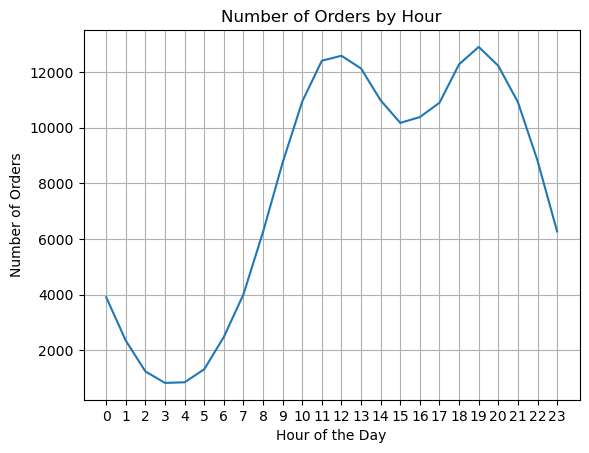

In [124]:
hourly_counts = all_data.groupby('Hour').count()['Count']

keys = hourly_counts.index.tolist()  #Assurer que c'est une list

plt.plot(keys, hourly_counts)
plt.xticks(keys)
plt.grid()
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.show()

# Je recommande avant 11am ou 7pm


### Quels produits sont le plus souvent vendus ensemble ?








In [126]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


In [134]:
df = pd.DataFrame(all_data)
# Group by Order_ID et ajout de  produit  a la liste
grouped = df.groupby('Order ID')['Product'].apply(list)

# Trouver combinaison des produit qui ont le meme numero d'o
combinations = grouped.apply(lambda x: pd.Series(list(zip(x, x[1:])))).stack().reset_index(drop=True)

# Compter les occurrences de chaque combinaison
combination_counts = combinations.value_counts()

# Afficher les combinaisons les plus courantes
print("Most often sold together:")
print(combination_counts.head())

Most often sold together:
(iPhone, Lightning Charging Cable)         1001
(Google Phone, USB-C Charging Cable)        984
(iPhone, Wired Headphones)                  362
(Vareebadd Phone, USB-C Charging Cable)     361
(iPhone, Apple Airpods Headphones)          313
Name: count, dtype: int64


## Quel produit a été le plus vendu ? Pourquoi pensez-vous qu'il a été le plus vendu ?

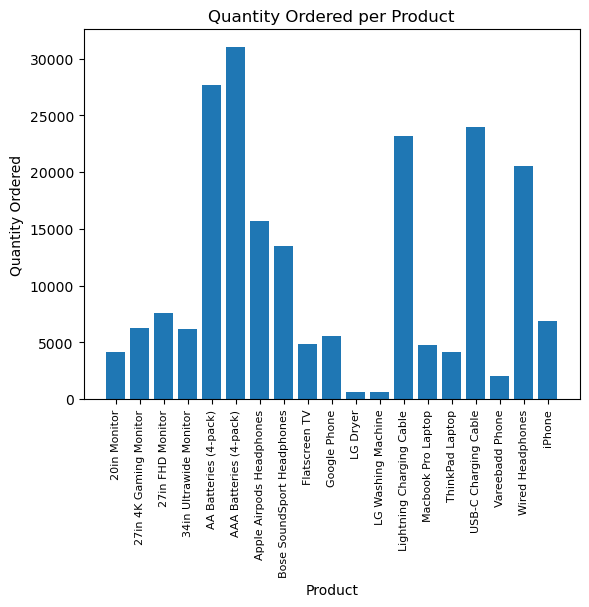

In [146]:

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

keys = quantity_ordered.index

plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.show()


Je suis convaincu que les produits les plus achetés sont généralement les moins chers. Dans le prochain Graph, nous allons prouver cette théorie en examinant les données d'achat. Cela nous permettra de mieux comprendre les habitudes d'achat des consommateurs.

C:\Users\DELL\AppData\Local\Temp\ipykernel_3216\2580150094.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3216\2580150094.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


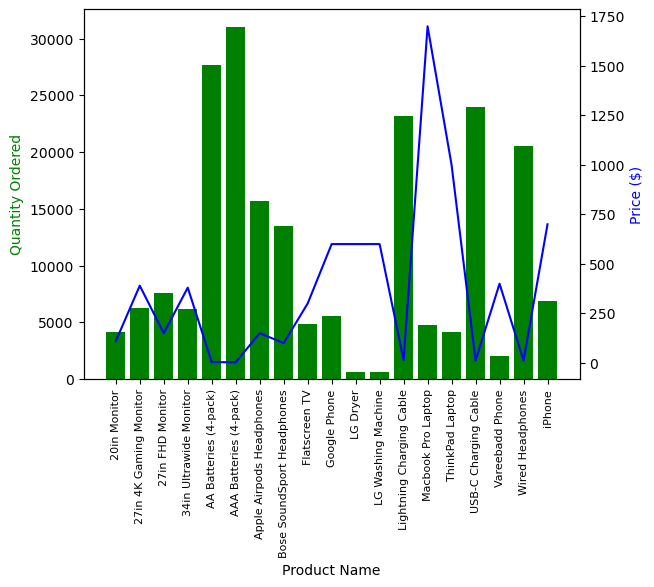

In [162]:
# Convertir le type de  'Price Each' column au numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
# Suprimmer les ligne null
missing_values = all_data['Price Each'].isnull().sum()
all_data = all_data.dropna(subset=['Price Each'])
#Group by Product par prix 
prices = all_data.groupby('Product')['Price Each'].mean()

#Maintenant on ajoute un nouveaux y-axis a notre ancien graph

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()